In [39]:
from WindPy import w
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import empyrical
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [26]:
data = w.wsd(['801821.SI', '801823.SI', '881001.WI'], 'close', '2004-01-01', '2018-03-16')

In [27]:
df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [28]:
df.head()

,801821.SI,801823.SI,881001.WI
2004-01-02,748.32,1333.00,933.7751
2004-01-05,746.08,1383.94,952.0375
2004-01-06,743.03,1397.86,955.8924
2004-01-07,746.29,1415.67,966.0709
2004-01-08,757.80,1433.27,981.7166


In [34]:
df.index = pd.to_datetime(df.index)

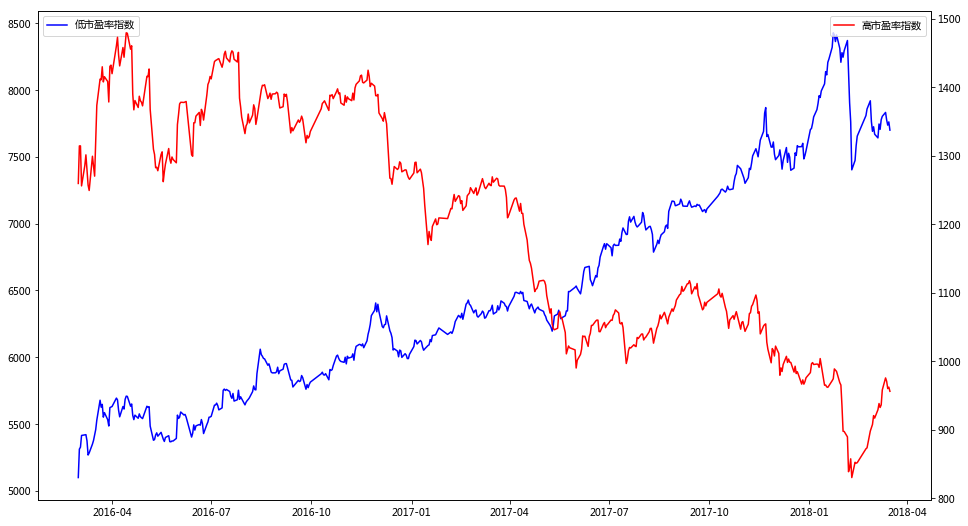

In [57]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax2 = ax1.twinx()
ax1.plot(df[df.index >= '2016-03-01']['801823.SI'], color='blue', label=u'低市盈率指数')
ax2.plot(df[df.index >= '2016-03-01']['801821.SI'], color='red', label=u'高市盈率指数')
ax2.legend()
ax1.legend(loc='upper left')

In [36]:
acc_ret = df[u'801823.SI'].pct_change() - df['801821.SI'].pct_change()

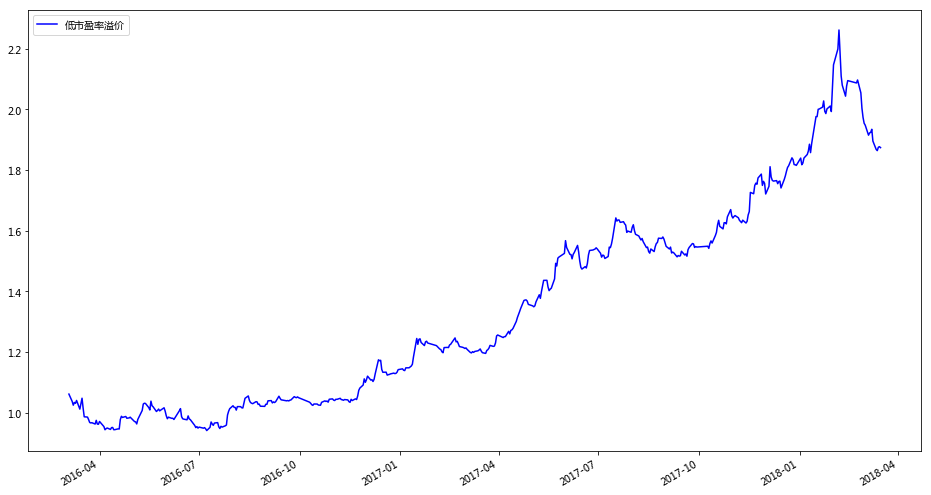

In [56]:
(1 + acc_ret[acc_ret.index >= '2016-03-04']).cumprod().plot(figsize=(16, 9), label=u'低市盈率溢价', color='blue')
plt.legend()

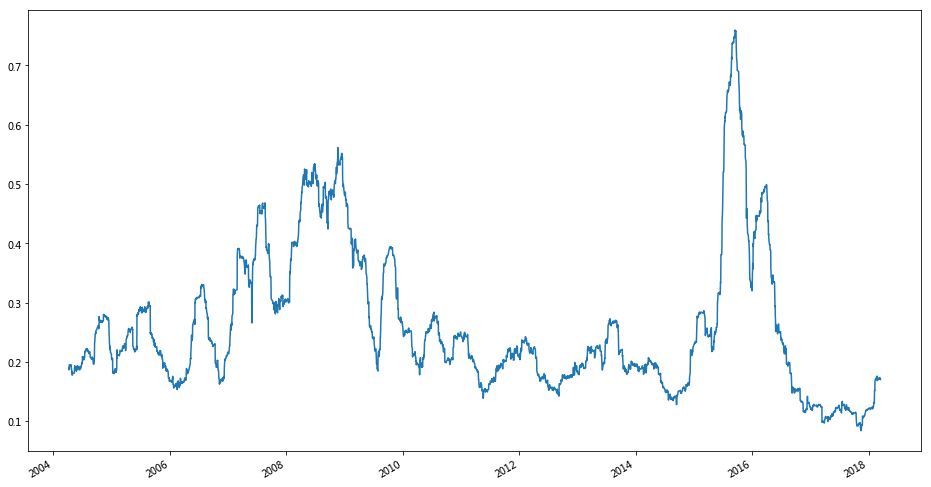

In [53]:
plt.figure(figsize=(16, 9))
K = 60
date = '2016-01-01'
x = df['881001.WI'].pct_change().rolling(window=K).apply(lambda x: empyrical.annual_volatility(x))
y = df['801823.SI'].pct_change(K) - df['801821.SI'].pct_change(K)
# plt.scatter(x.resample('M').last(), y.resample('M').last())
x.plot()